In [17]:
import numpy as np
import os
import mne
import warnings
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2
from MDFA import MDFA

In [3]:
MEFAR_dataset_root='/Users/athenasaghi/Downloads/MEFAR/all_raw_eeg_data'
files = os.listdir(MEFAR_dataset_root)
morning_files = [file for file in files if 'morning' in file]

evening_files = [file for file in files if 'evening' in file]
morning_files,len(morning_files) ,evening_files,len(evening_files)

(['subject_18_1.morning_EEG.csv',
  'subject_5_1.morning_EEG.csv',
  'subject_19_1.morning_EEG.csv',
  'subject_4_1.morning_EEG.csv',
  'subject_1_1.morning_EEG.csv',
  'subject_7_1.morning_EEG.csv',
  'subject_2_1.morning_EEG.csv',
  'subject_6_1.morning_EEG.csv',
  'subject_3_1.morning_EEG.csv',
  'subject_17_1.morning_EEG.csv',
  'subject_23_1.morning_EEG.csv',
  'subject_12_1.morning_EEG.csv',
  'subject_16_1.morning_EEG.csv',
  'subject_22_1.morning_EEG.csv',
  'subject_13_1.morning_EEG.csv',
  'subject_15_1.morning_EEG.csv',
  'subject_8_1.morning_EEG.csv',
  'subject_21_1.morning_EEG.csv',
  'subject_10_1.morning_EEG.csv',
  'subject_14_1.morning_EEG.csv',
  'subject_20_1.morning_EEG.csv',
  'subject_9_1.morning_EEG.csv',
  'subject_11_1.morning_EEG.csv'],
 23,
 ['subject_12_2.evening_EEG.csv',
  'subject_17_2.evening_EEG.csv',
  'subject_23_2.evening_EEG.csv',
  'subject_13_2.evening_EEG.csv',
  'subject_16_2.evening_EEG.csv',
  'subject_22_2.evening_EEG.csv',
  'subject_10_2.e

-----subject_18_1.morning_EEG.csv-----


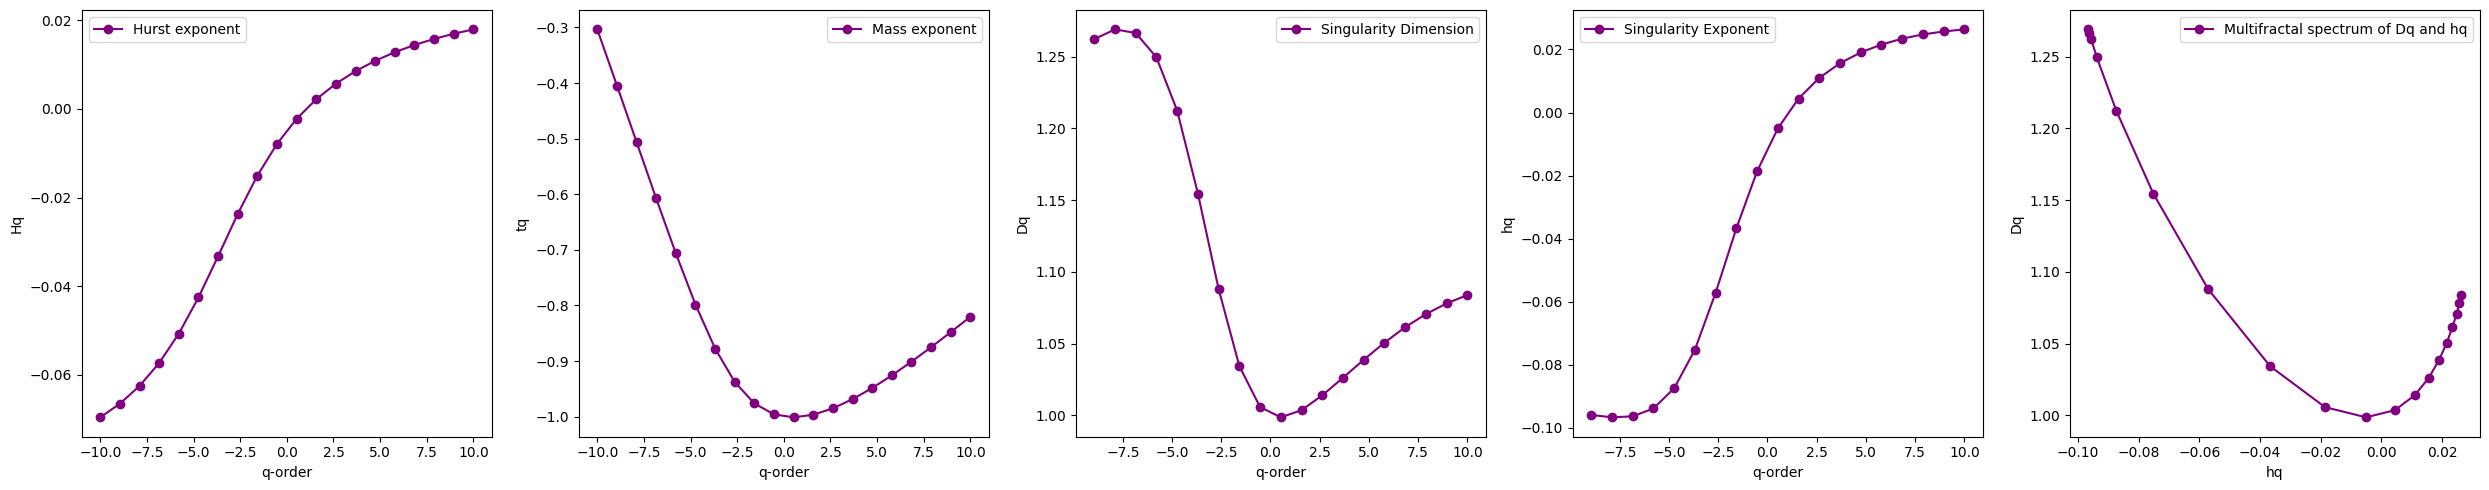

-----subject_5_1.morning_EEG.csv-----


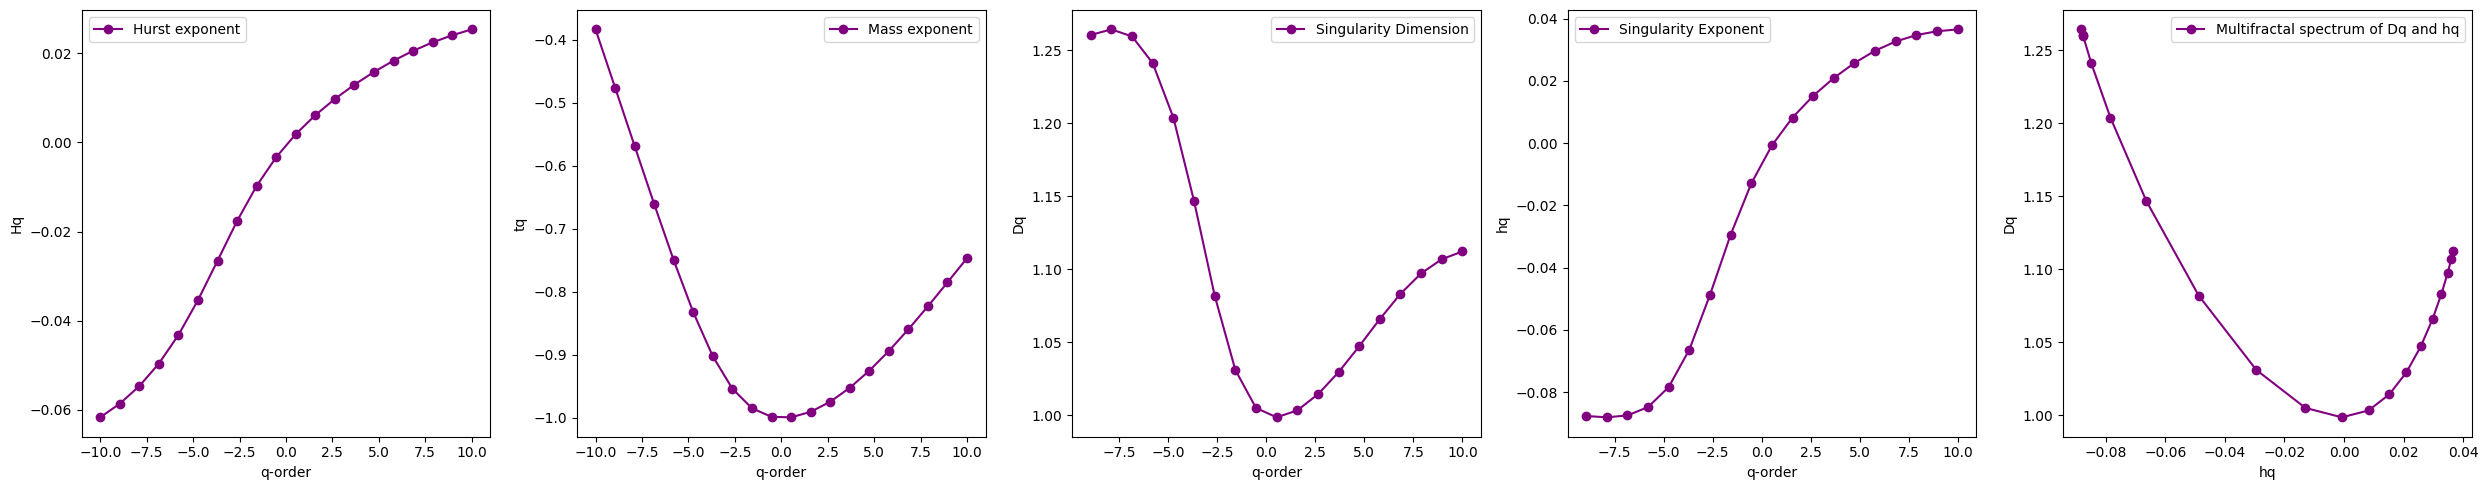

-----subject_19_1.morning_EEG.csv-----


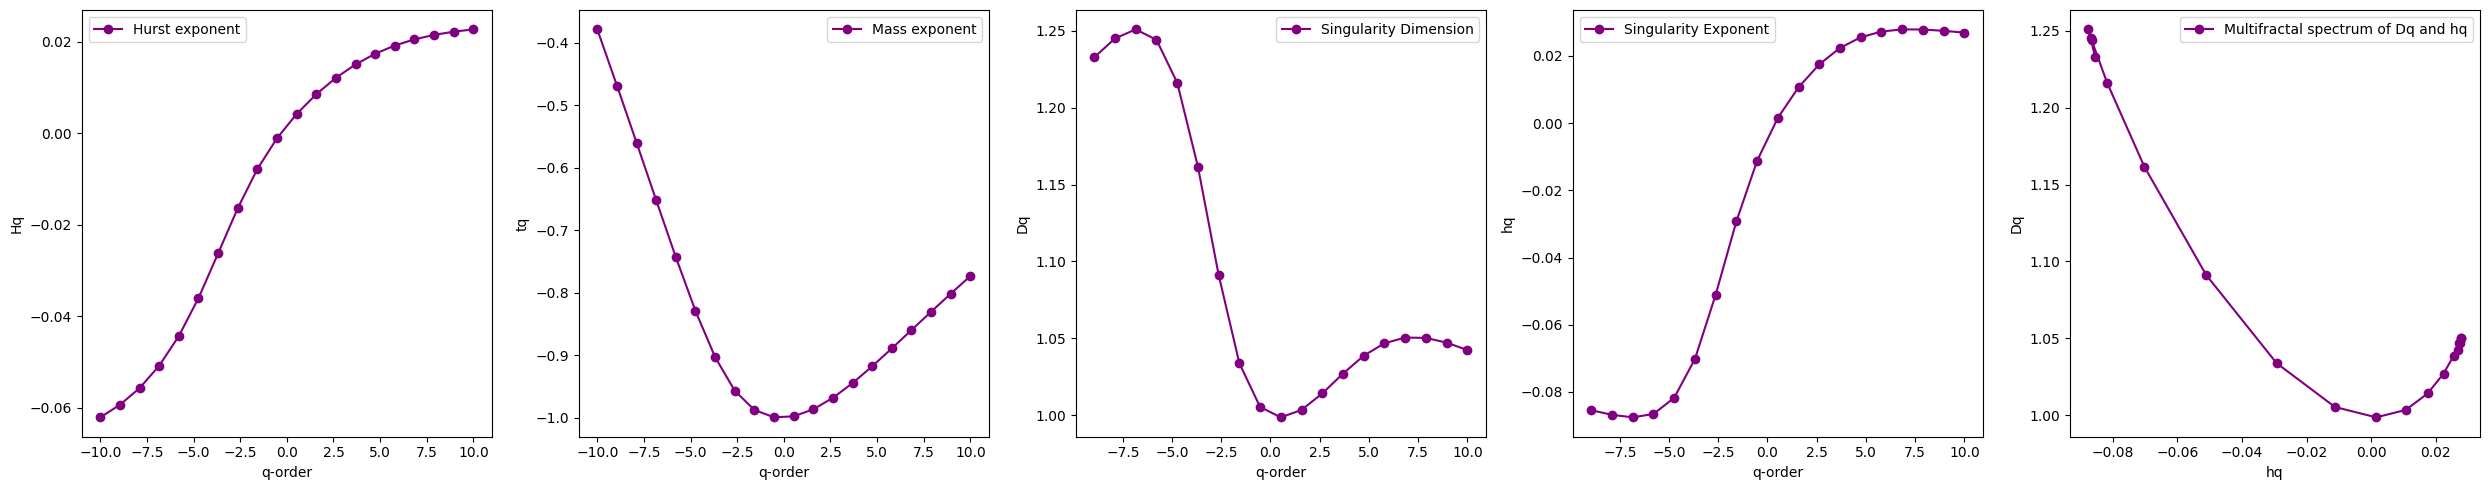

-----subject_4_1.morning_EEG.csv-----


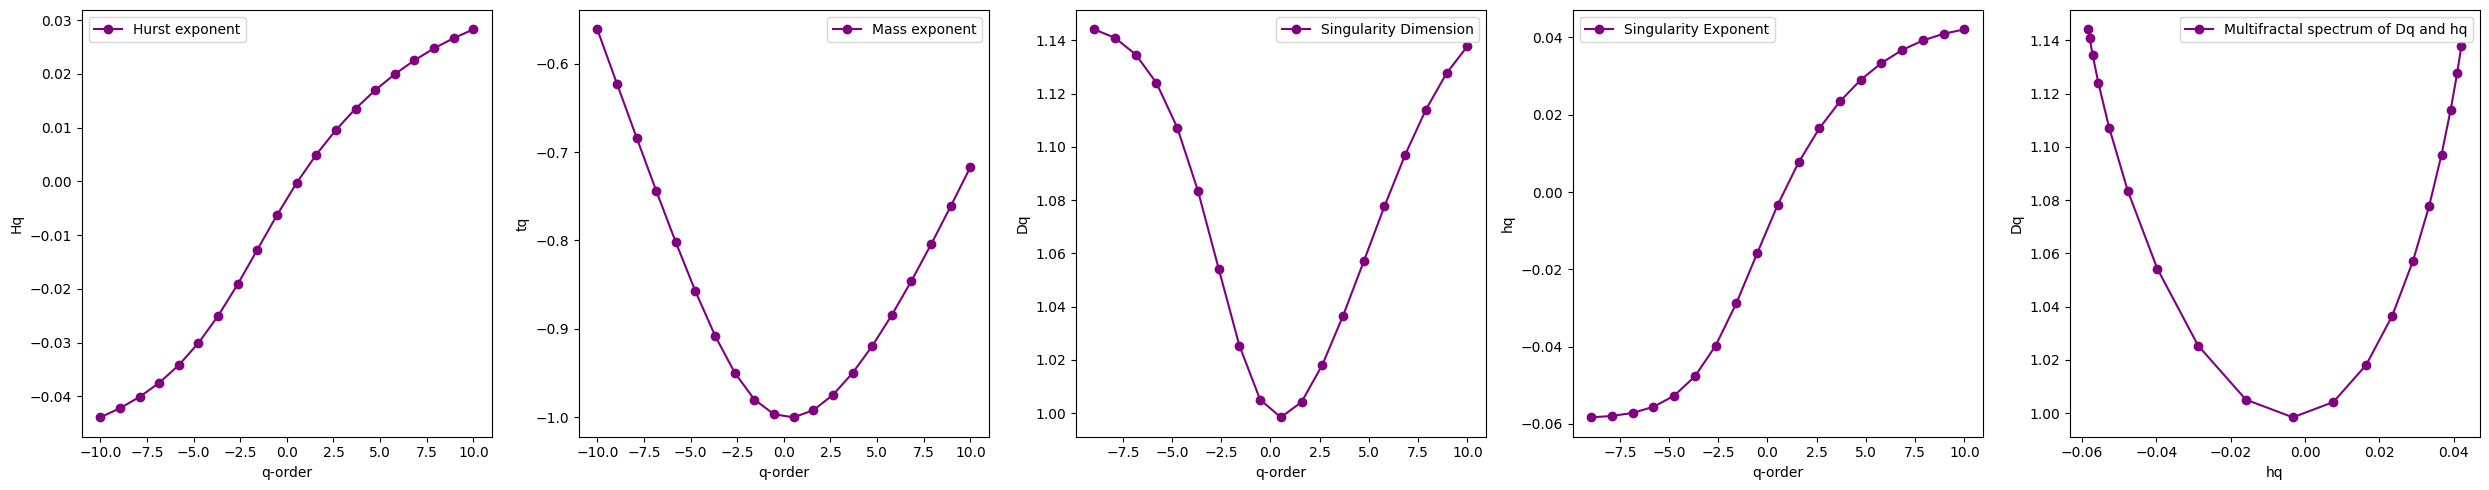

-----subject_1_1.morning_EEG.csv-----


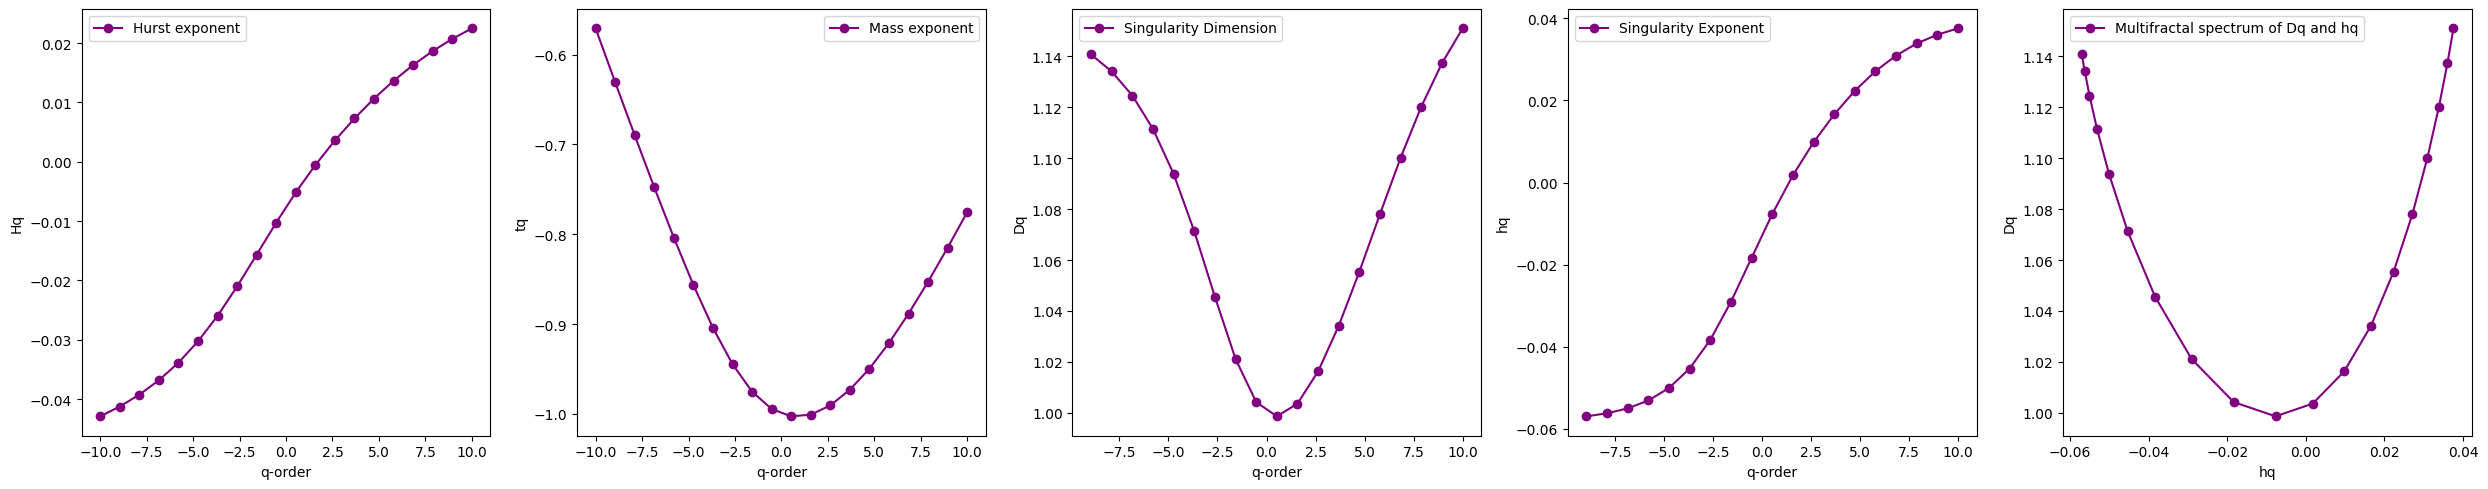

-----subject_7_1.morning_EEG.csv-----


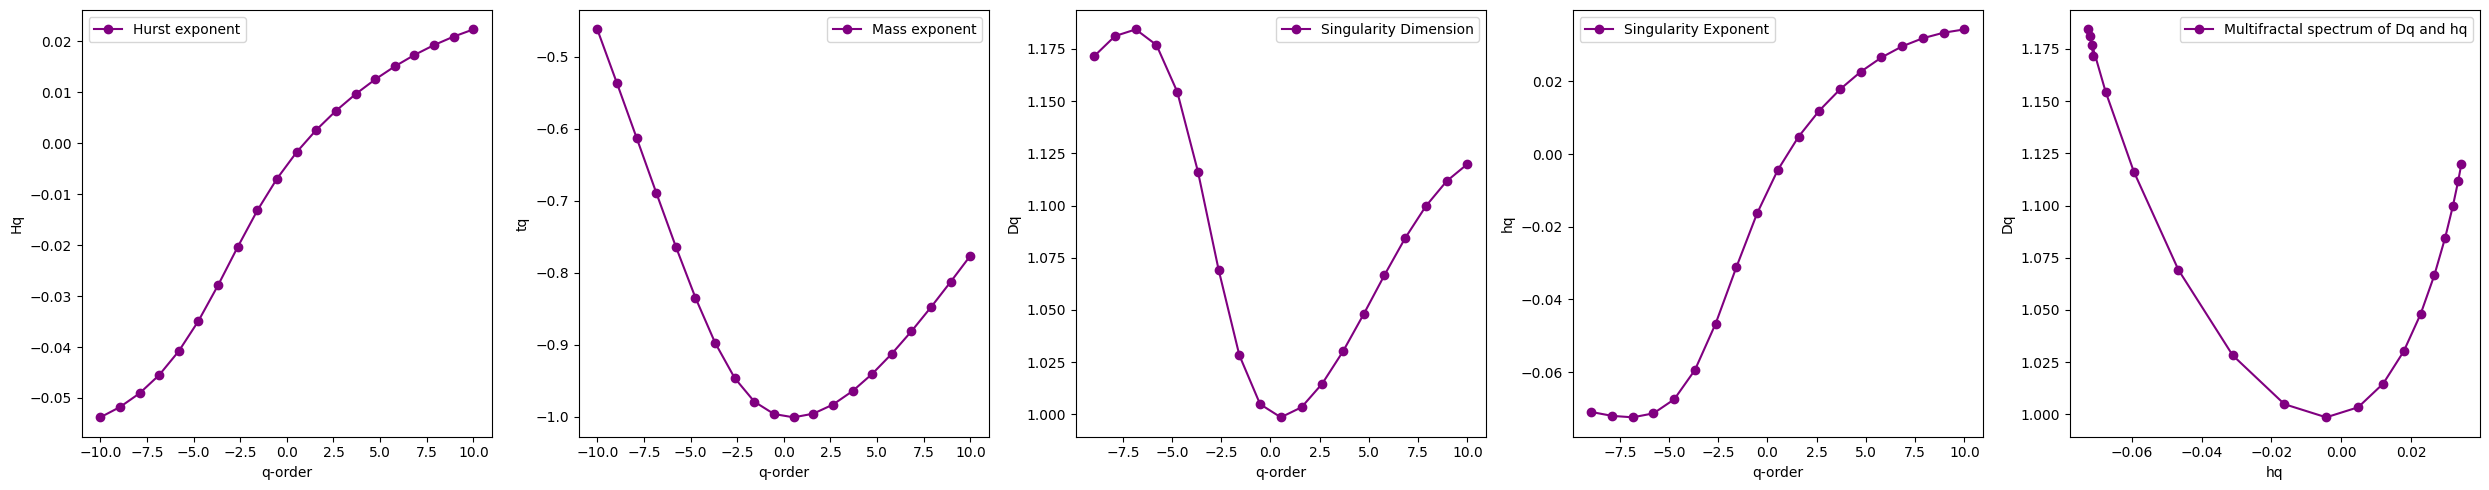

-----subject_2_1.morning_EEG.csv-----


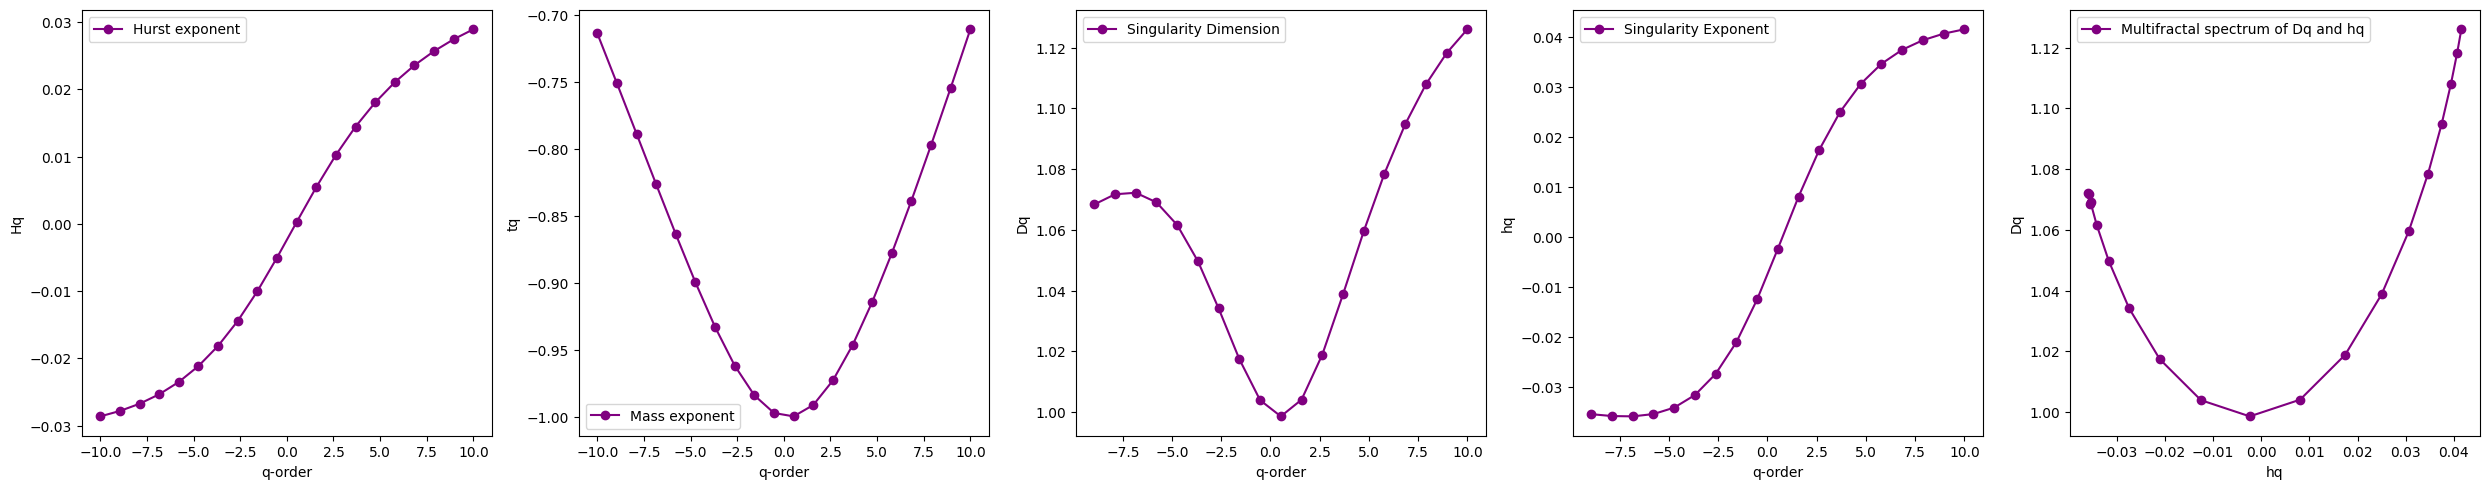

-----subject_6_1.morning_EEG.csv-----


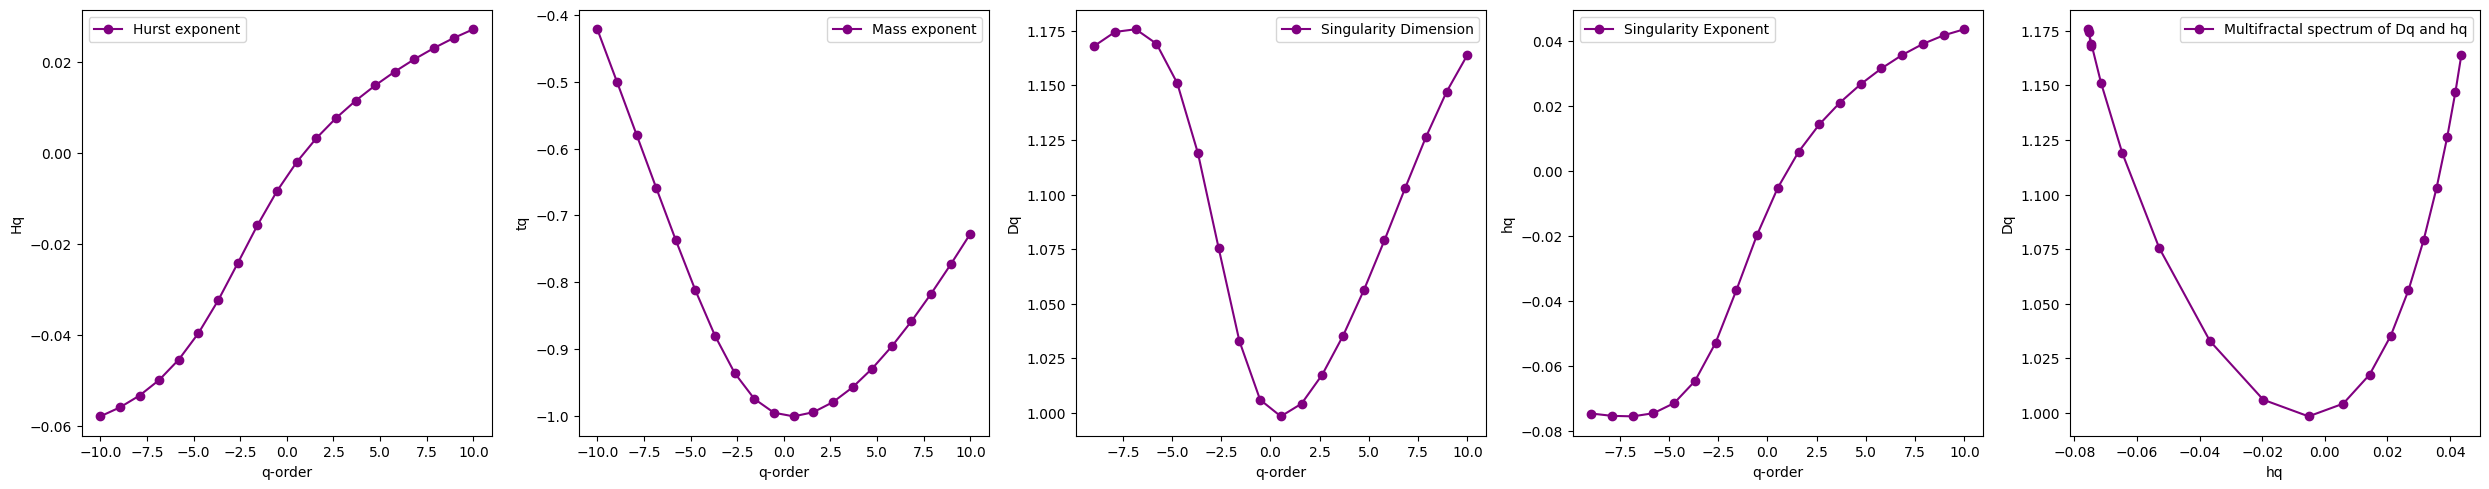

-----subject_3_1.morning_EEG.csv-----


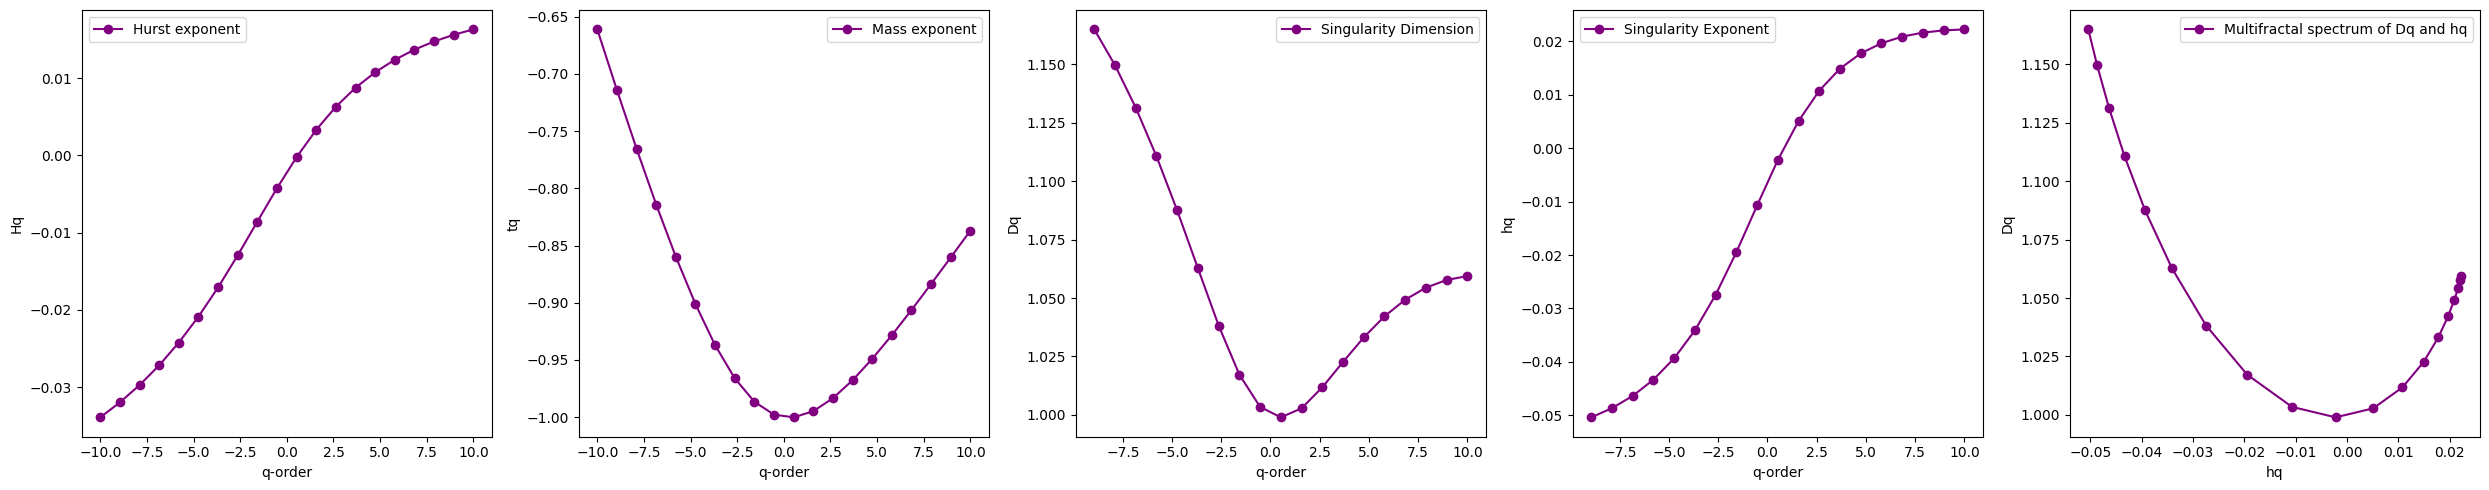

-----subject_17_1.morning_EEG.csv-----


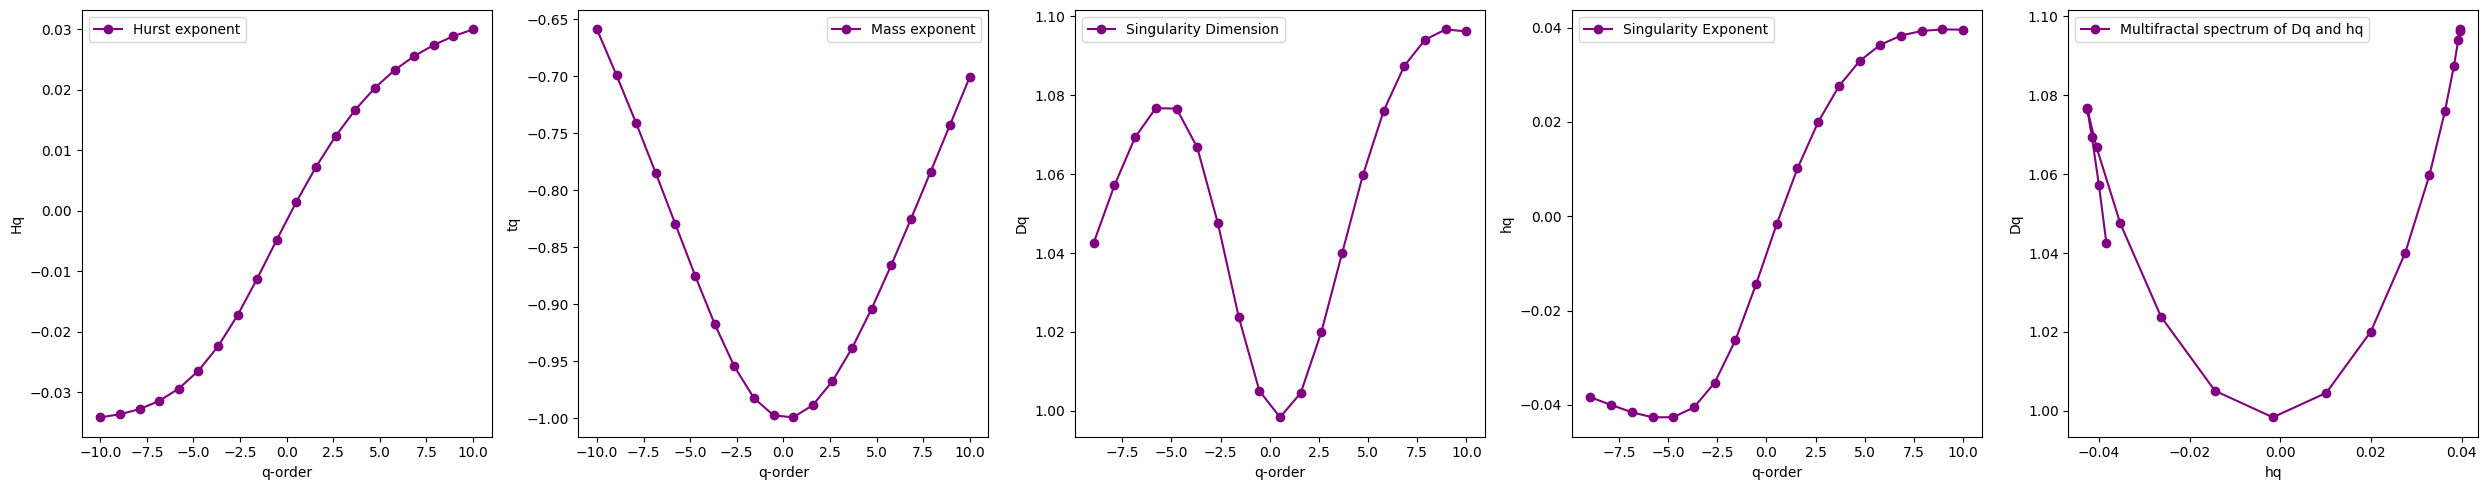

-----subject_23_1.morning_EEG.csv-----


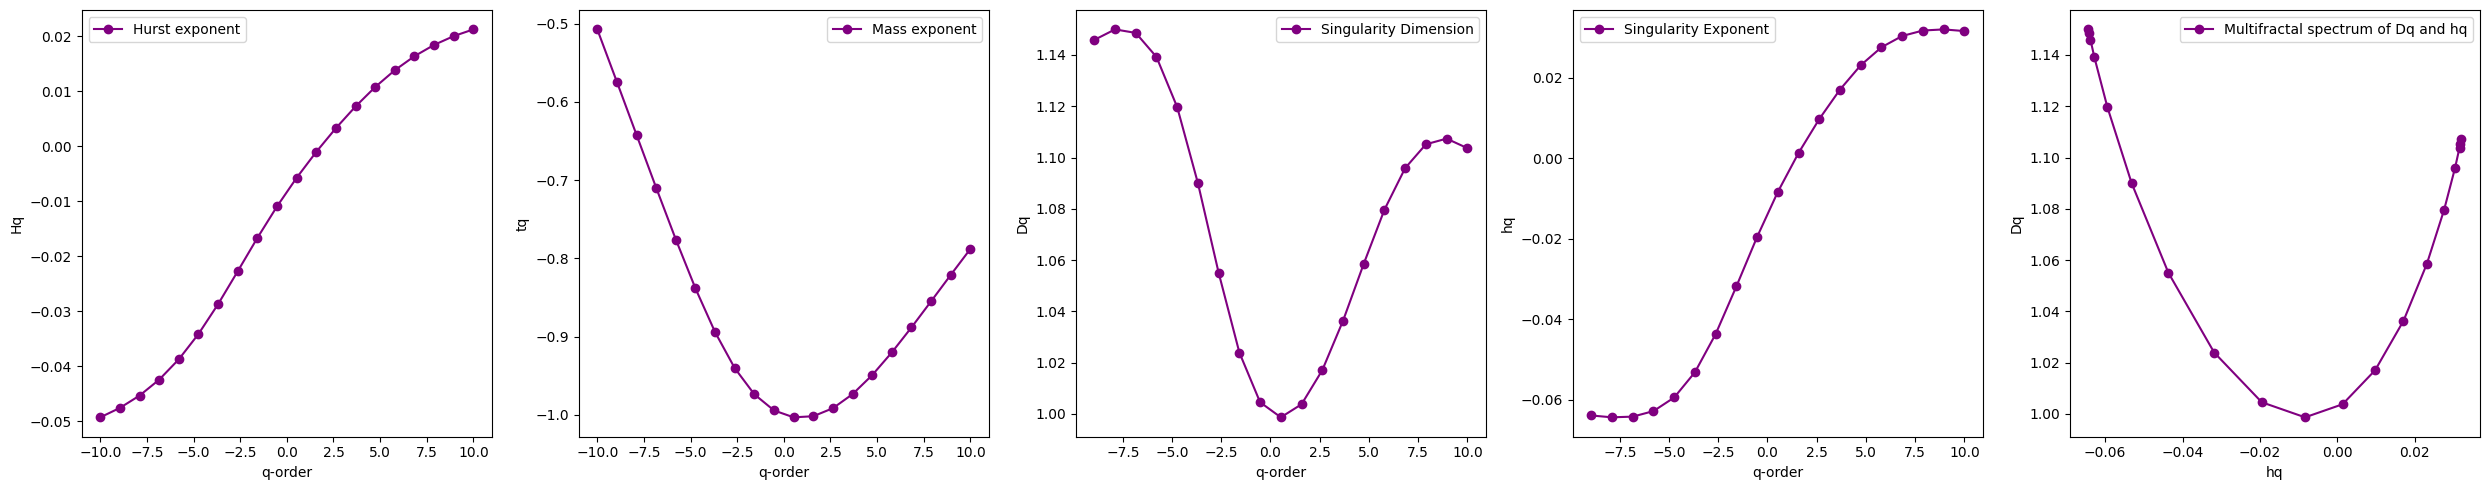

-----subject_12_1.morning_EEG.csv-----


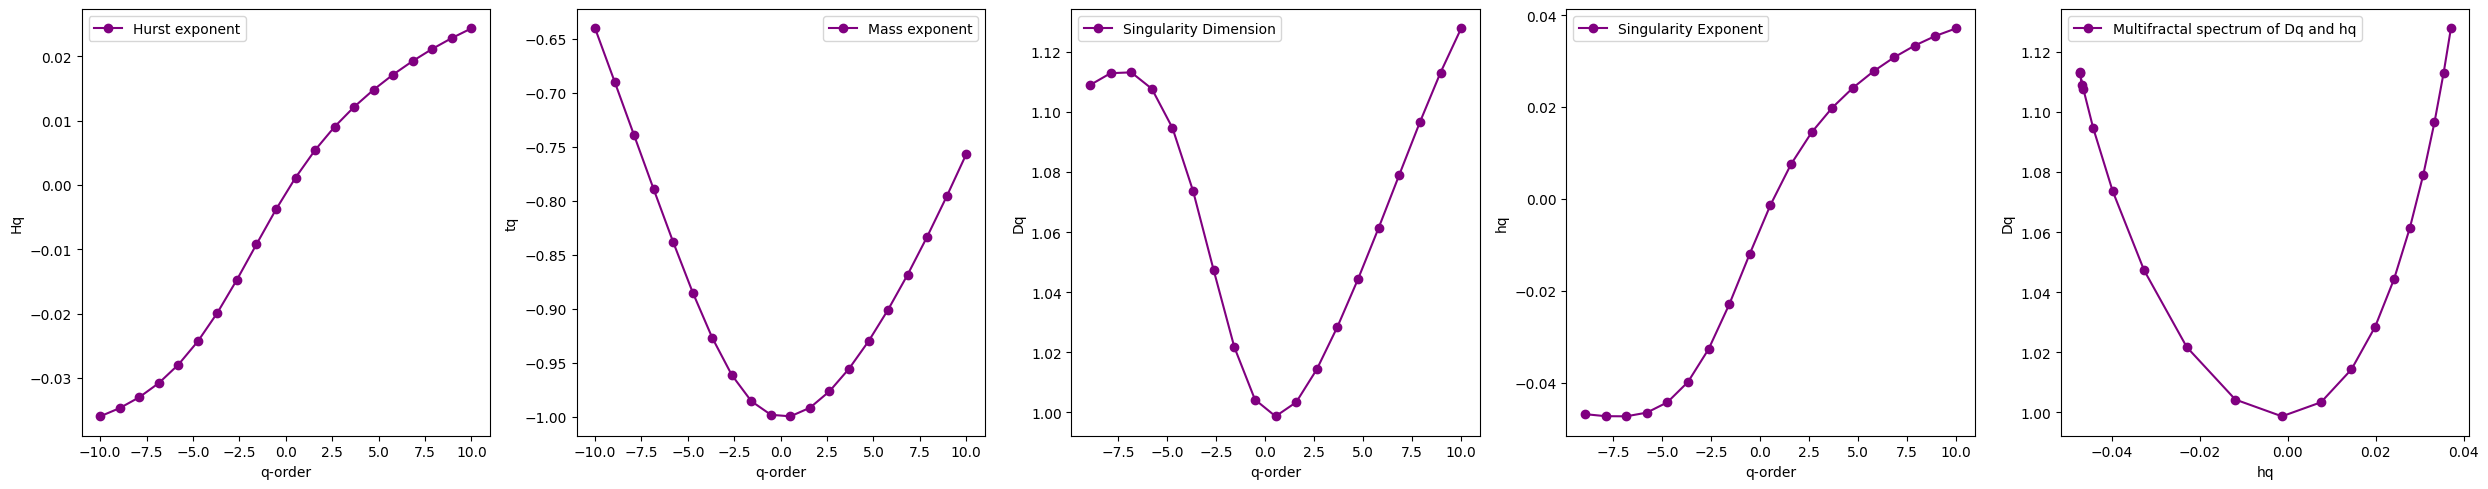

-----subject_16_1.morning_EEG.csv-----


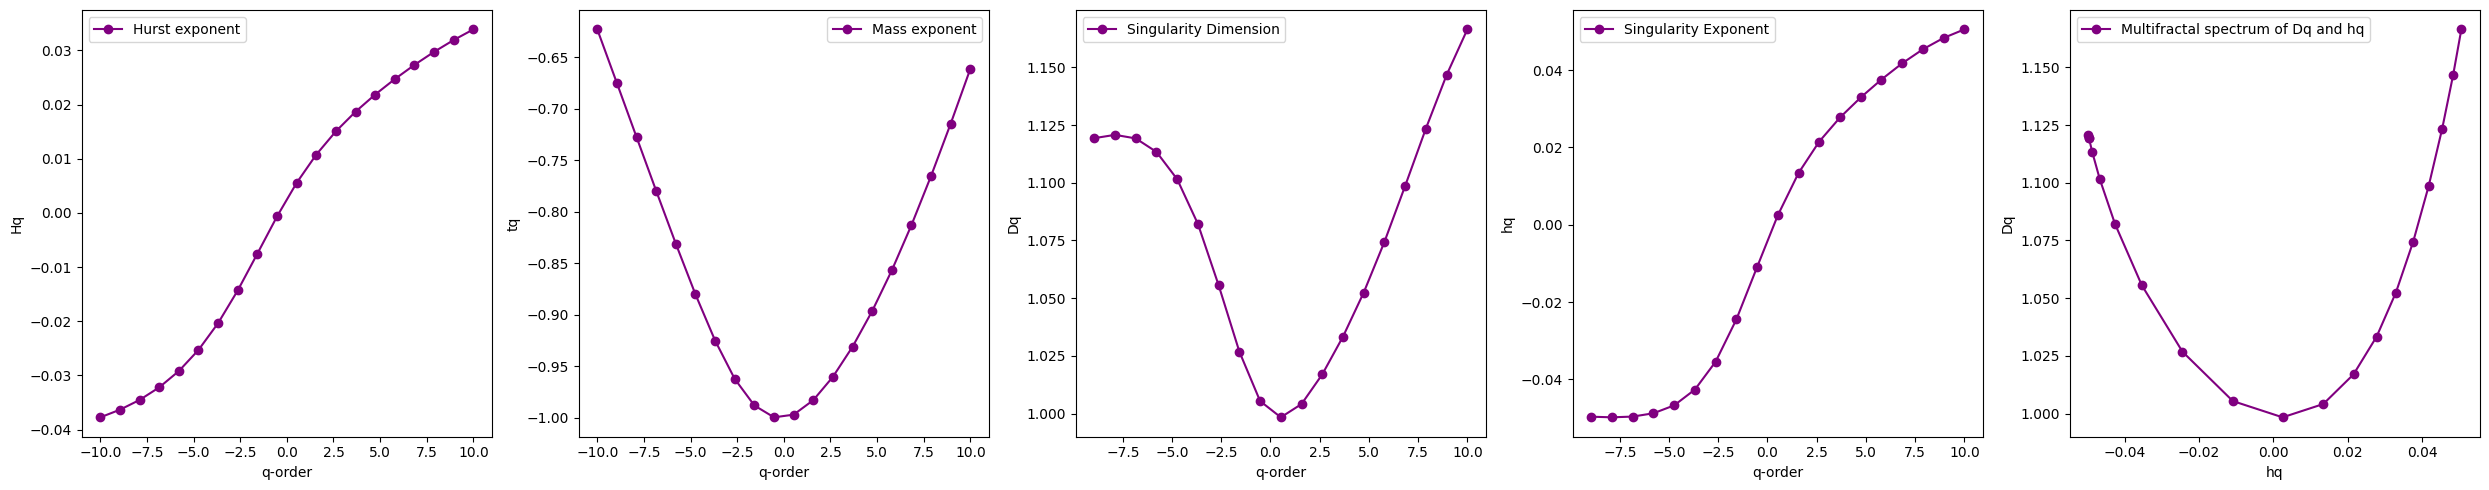

-----subject_22_1.morning_EEG.csv-----


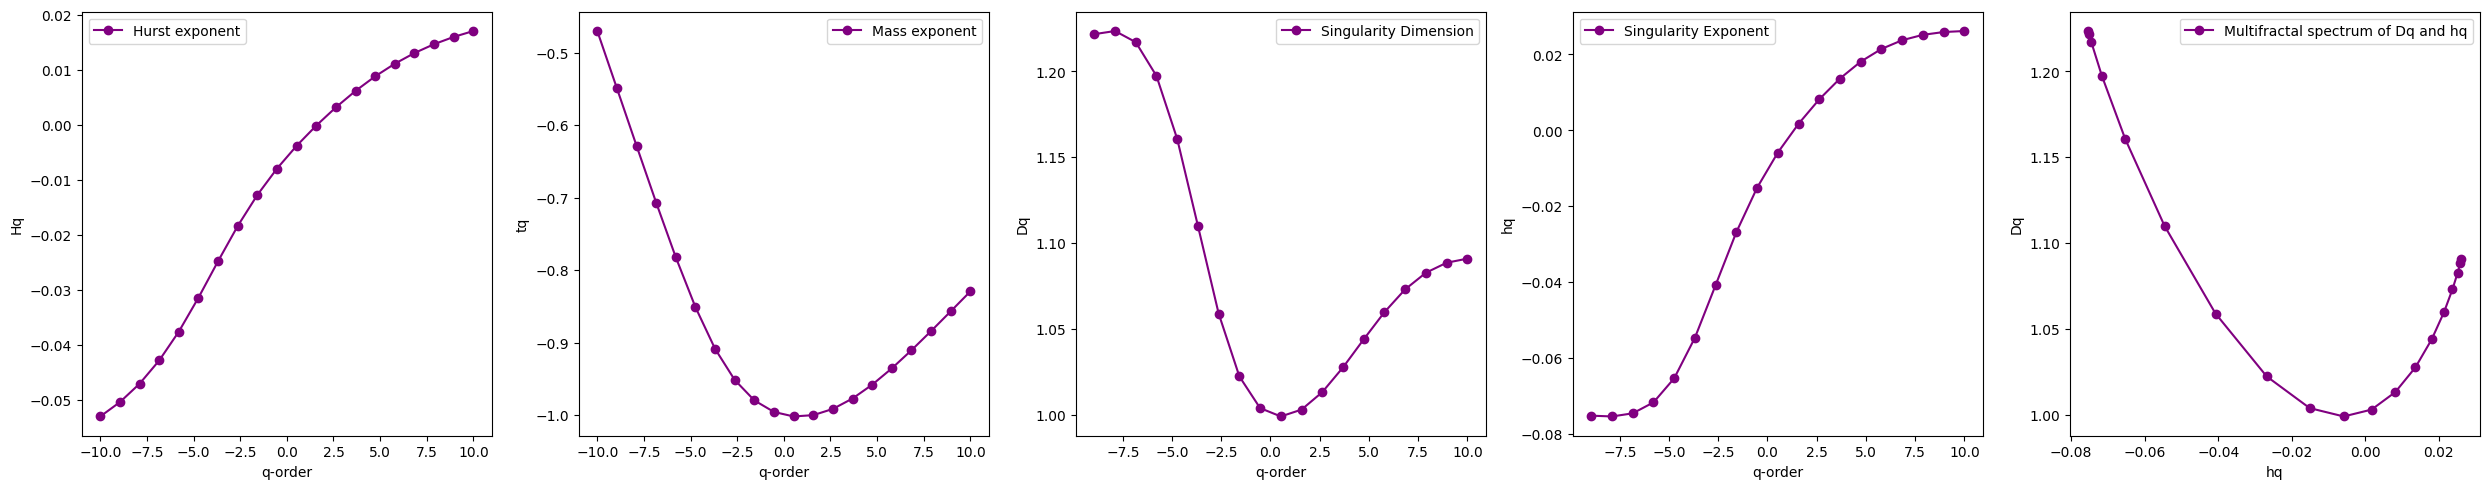

-----subject_13_1.morning_EEG.csv-----


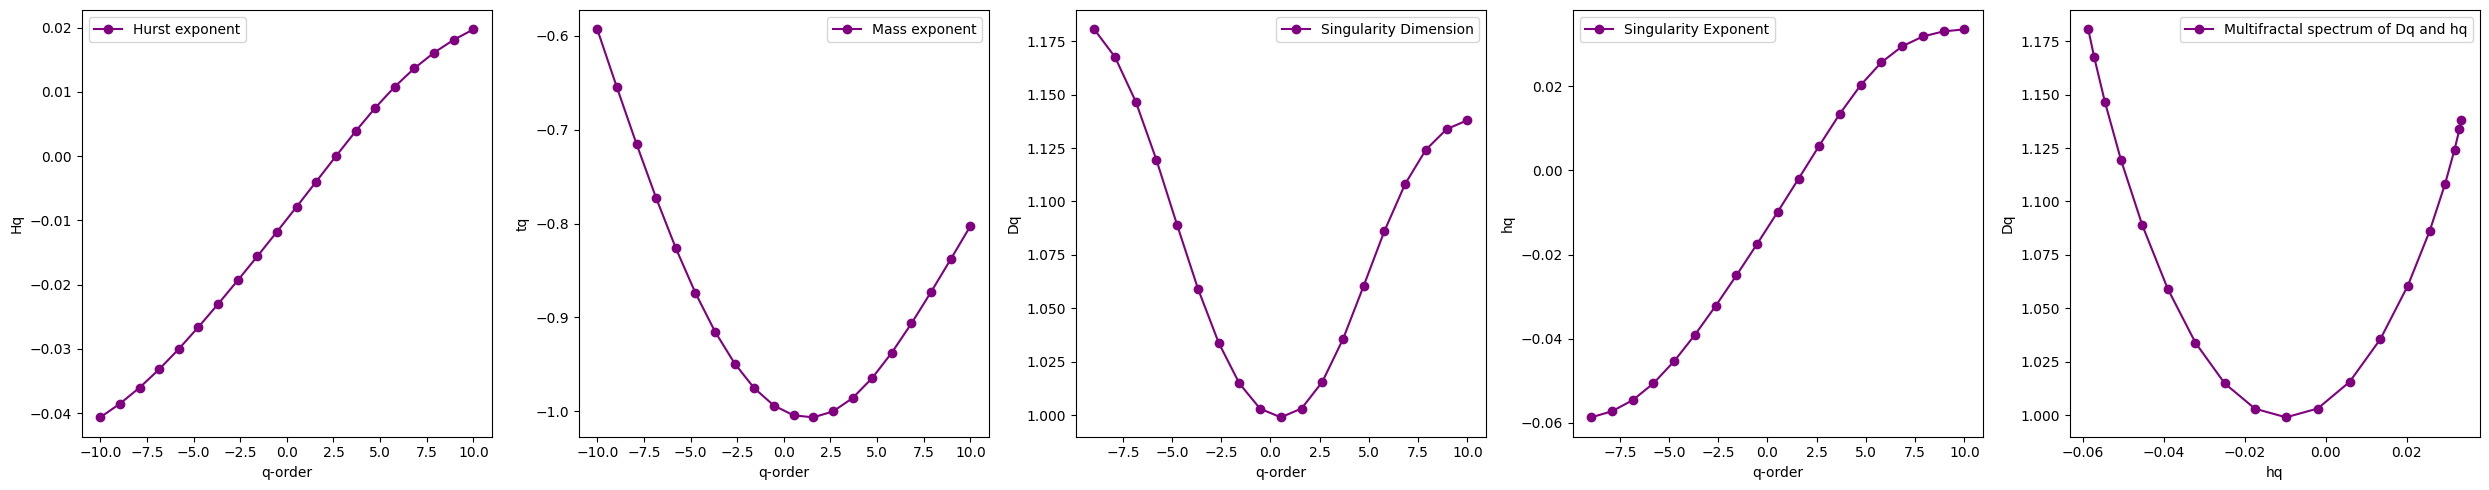

-----subject_15_1.morning_EEG.csv-----


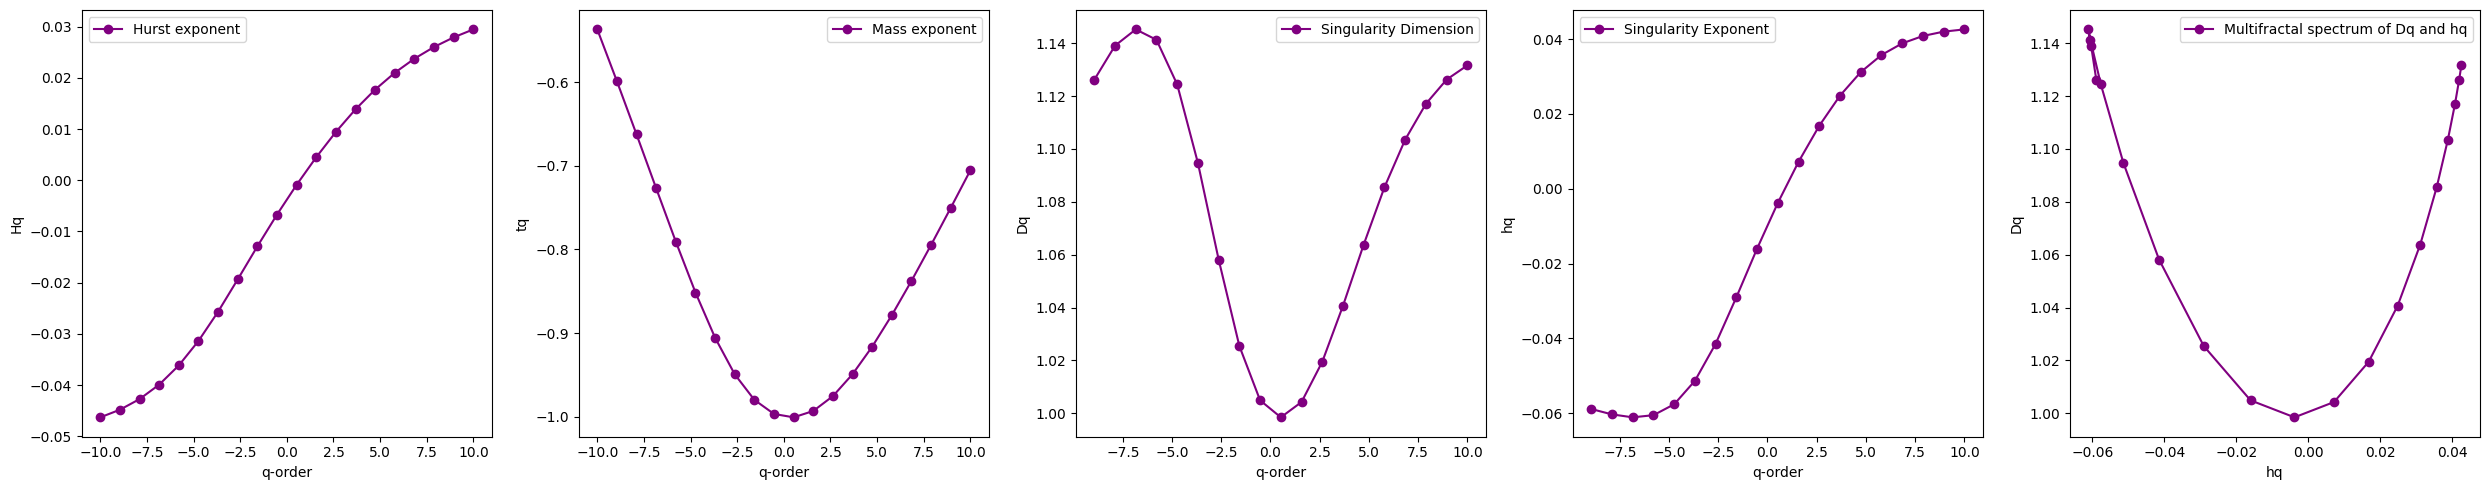

-----subject_8_1.morning_EEG.csv-----


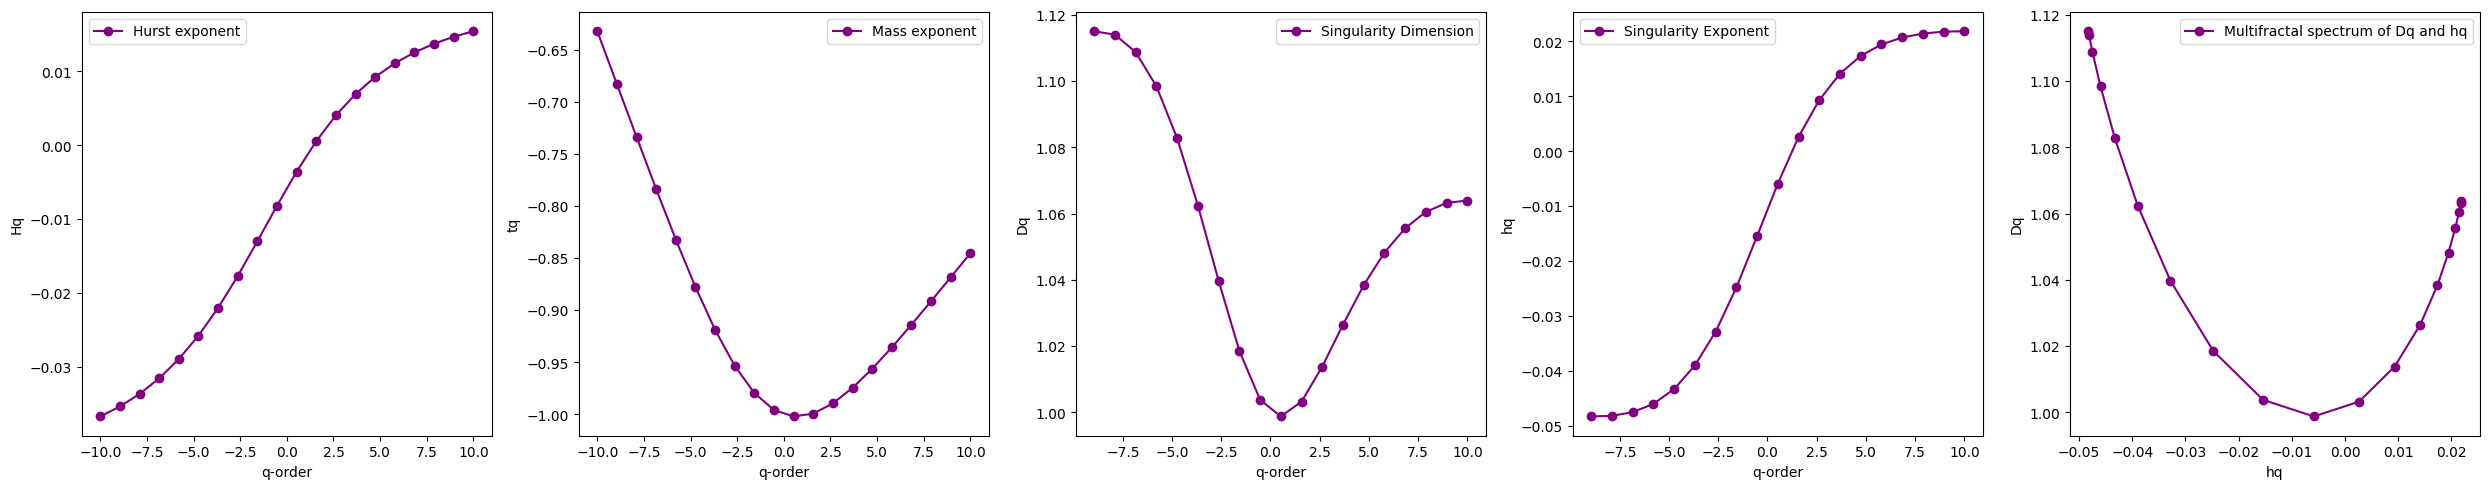

-----subject_21_1.morning_EEG.csv-----


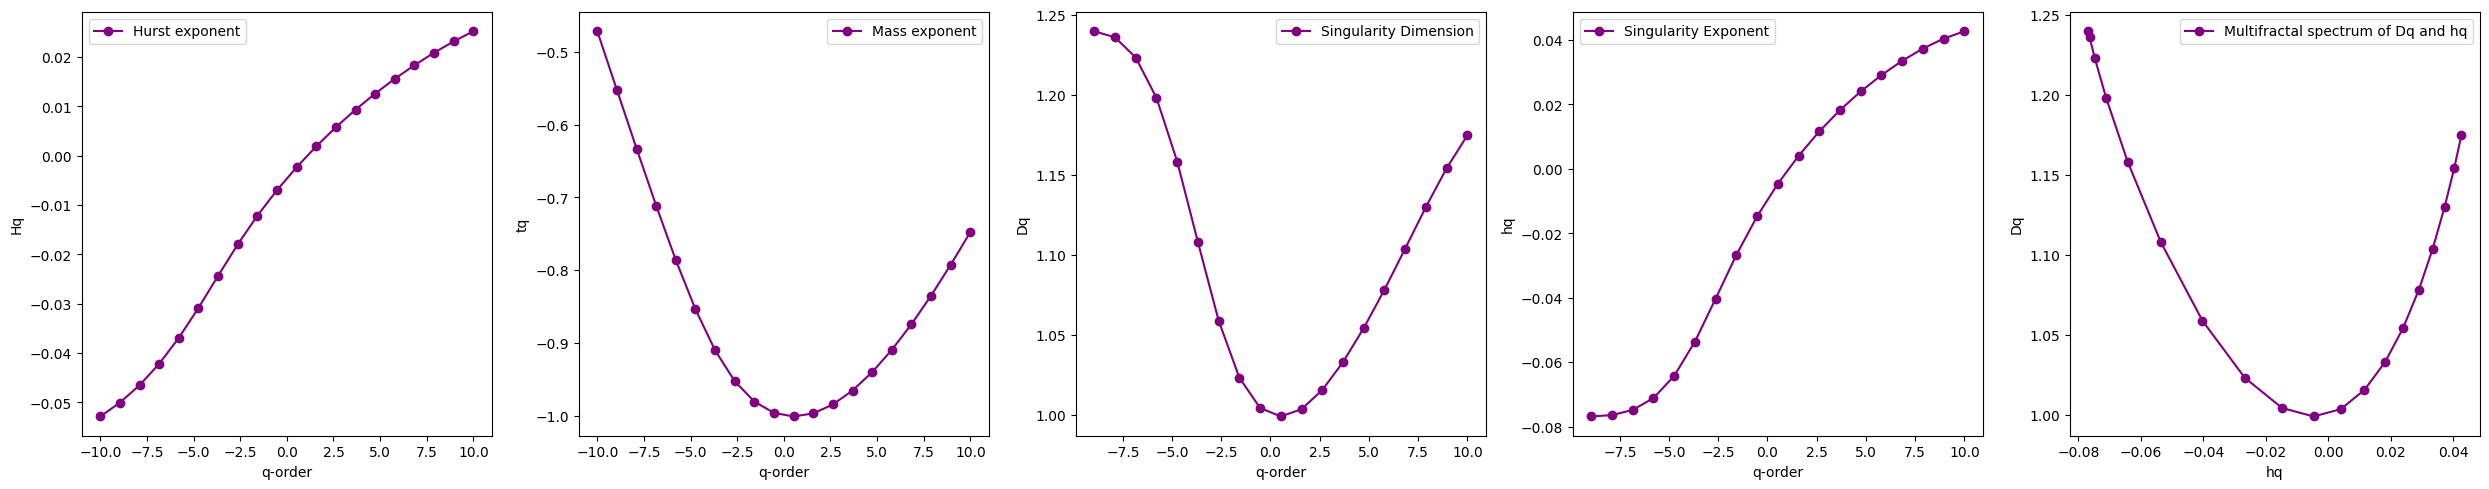

-----subject_10_1.morning_EEG.csv-----


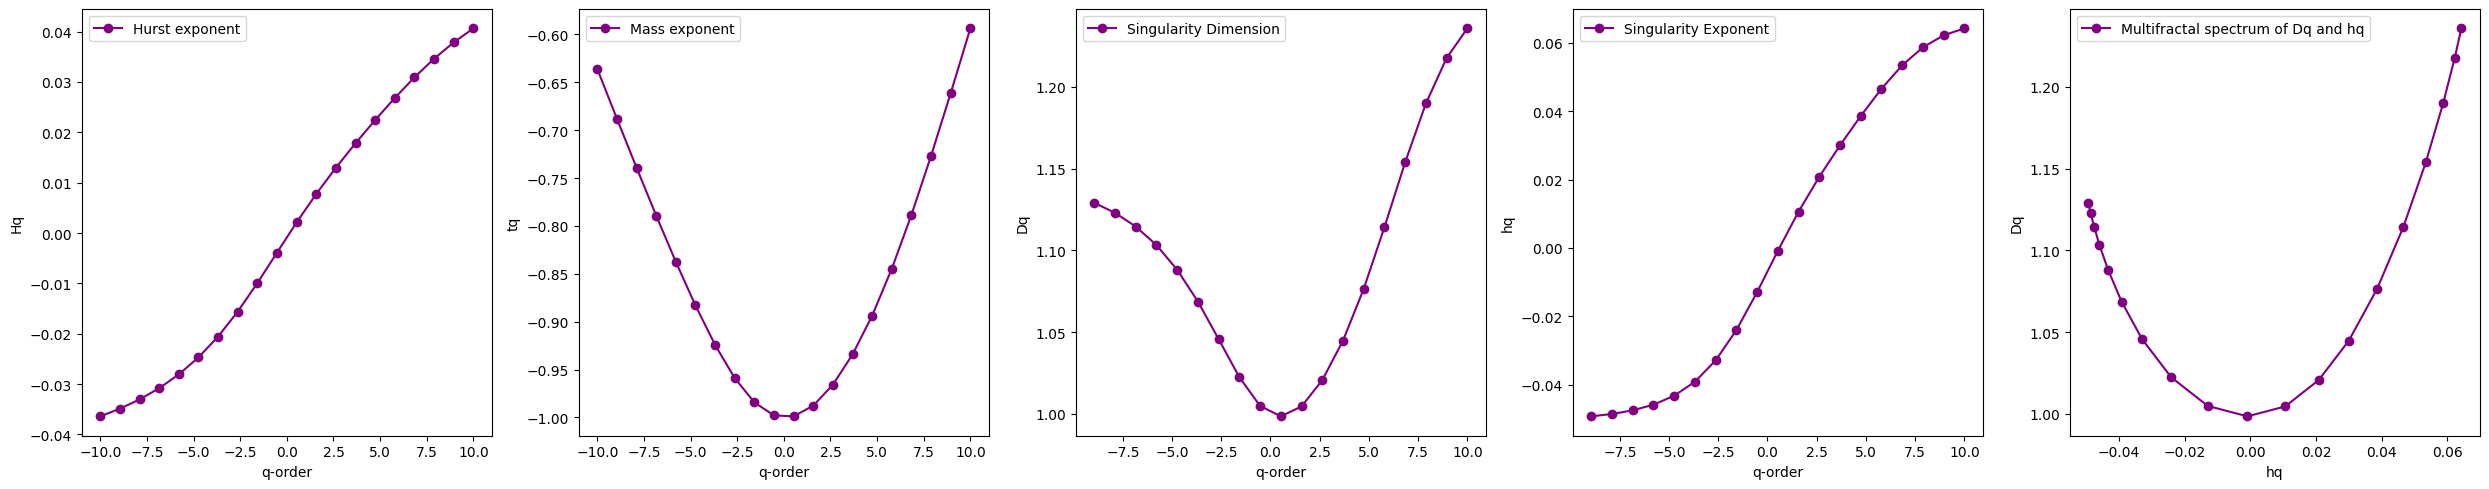

-----subject_14_1.morning_EEG.csv-----


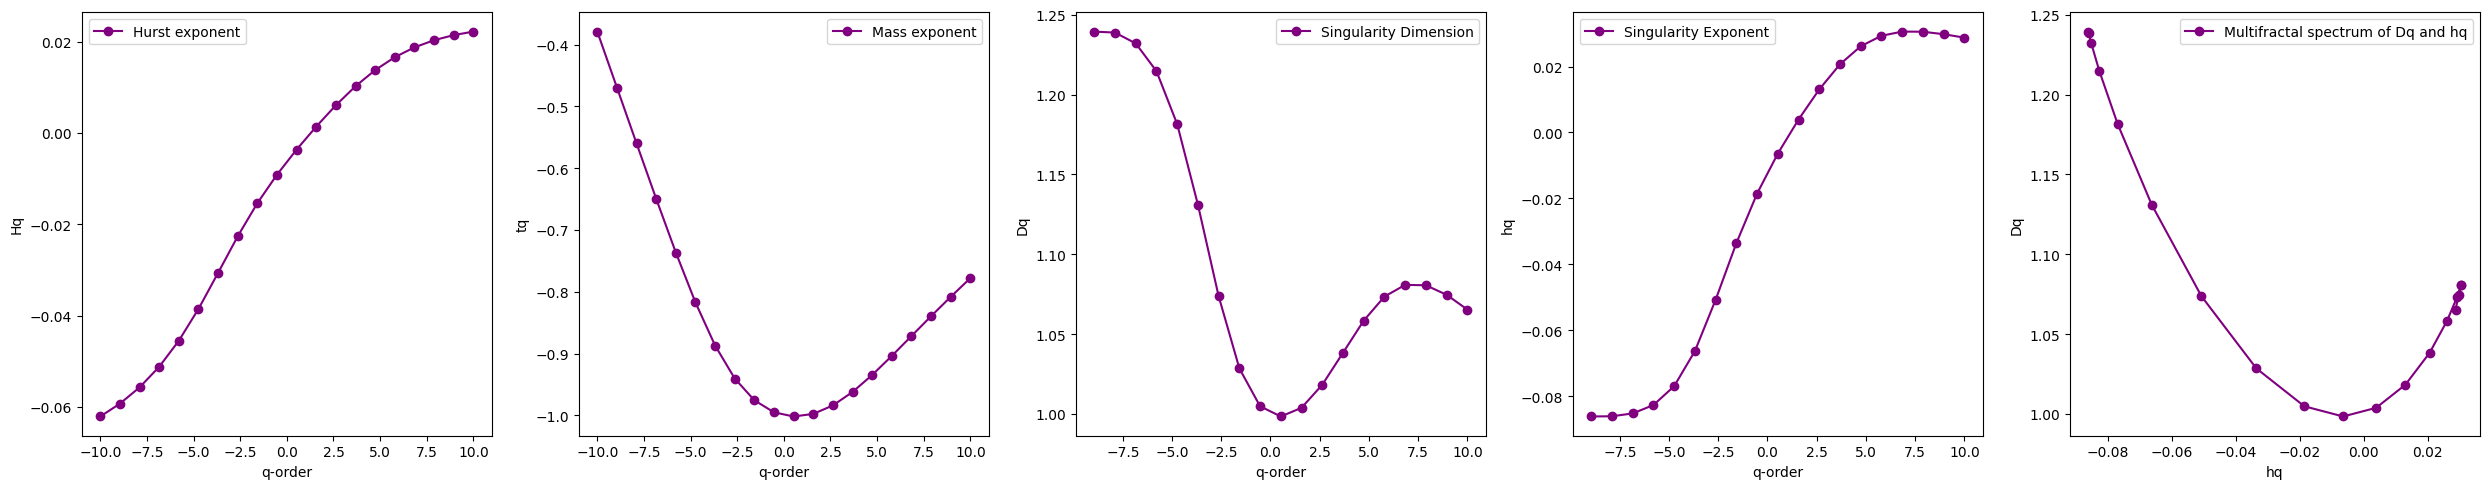

-----subject_20_1.morning_EEG.csv-----


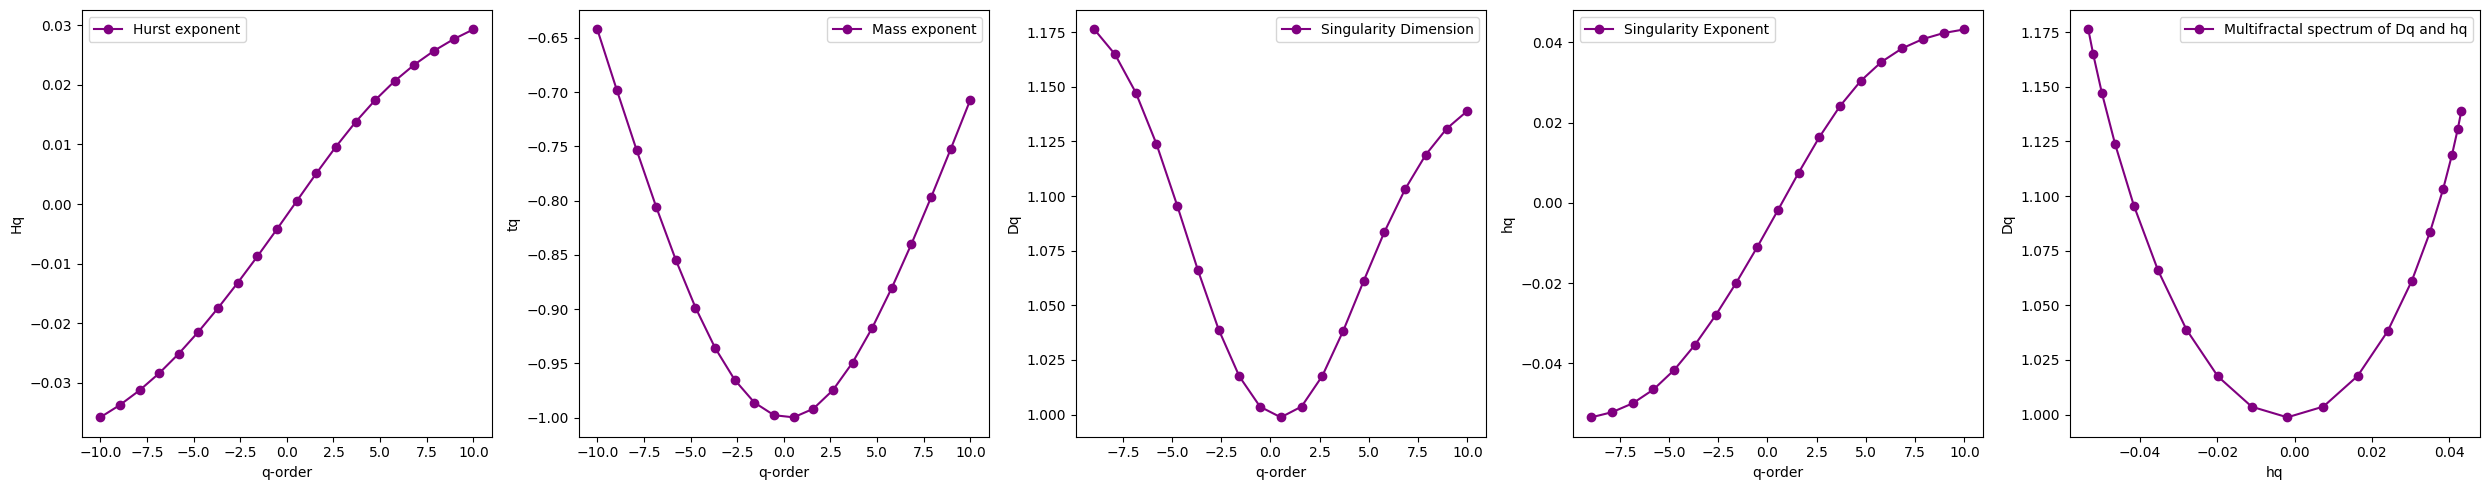

-----subject_9_1.morning_EEG.csv-----


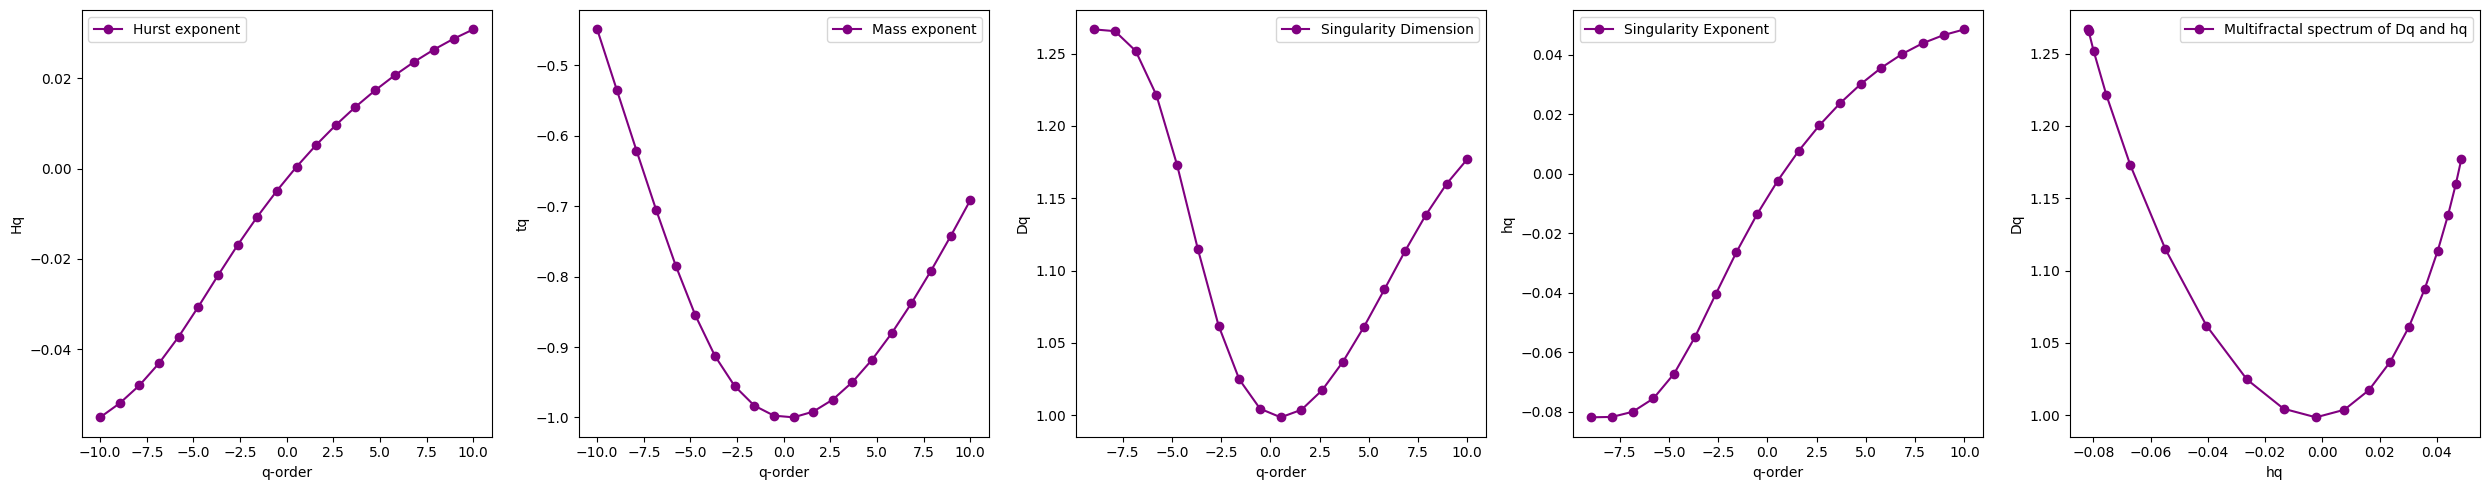

-----subject_11_1.morning_EEG.csv-----


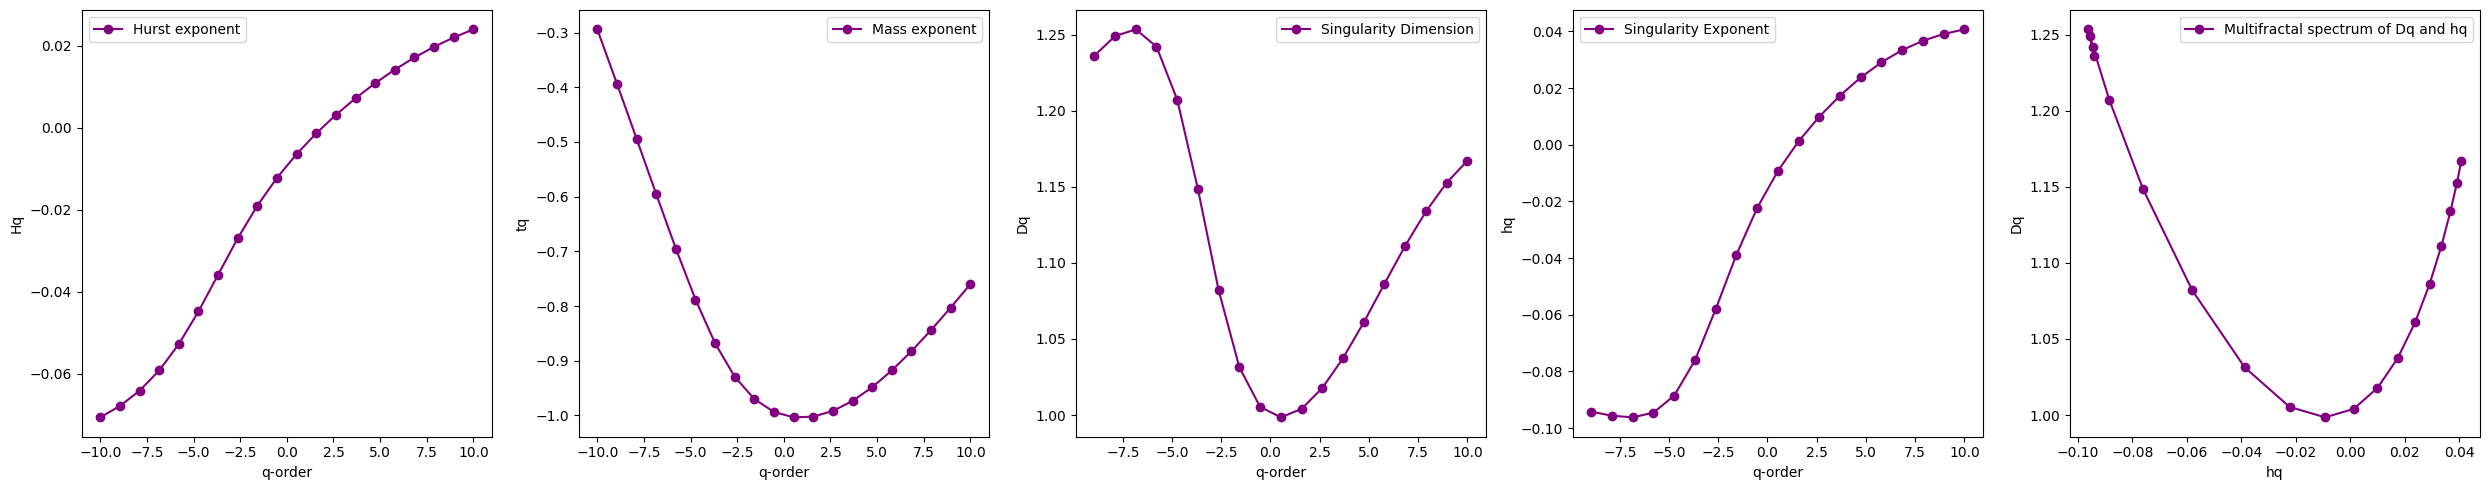

In [4]:
scales = [16, 32, 64, 128, 256, 512, 1024]
# scales = np.linspace(16,2000,20).astype(int)
q =np.linspace(-10, 10, 20)
columns_of_interest = ['Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']

for fname in morning_files:
    print('-----{}-----'.format(fname))
    path_to_file= os.path.join(MEFAR_dataset_root,fname)
    df = pd.read_csv(path_to_file)
    df_selected = df[columns_of_interest]
    signal = df_selected.to_numpy()
    signal = signal.T
    mdfa = MDFA(signal,'Theta',scales,q,True, 2, k=False,fname=fname,dataset_name = 'MEFAR')
    mdfa.MDFA_whole()

-----subject_18_1.morning_EEG.csv-----


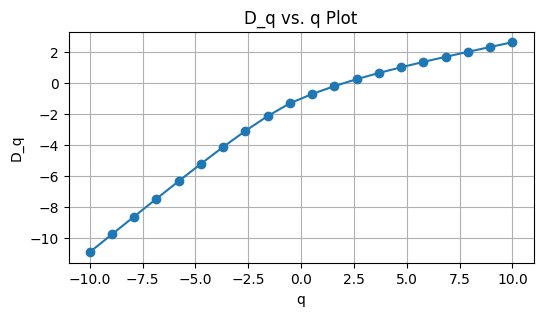

-----subject_5_1.morning_EEG.csv-----


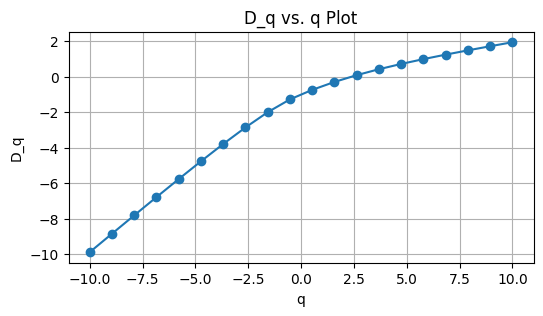

-----subject_19_1.morning_EEG.csv-----


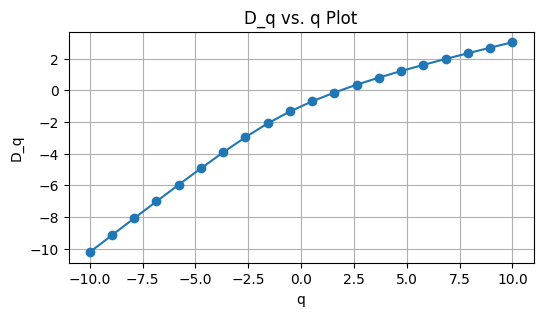

-----subject_4_1.morning_EEG.csv-----


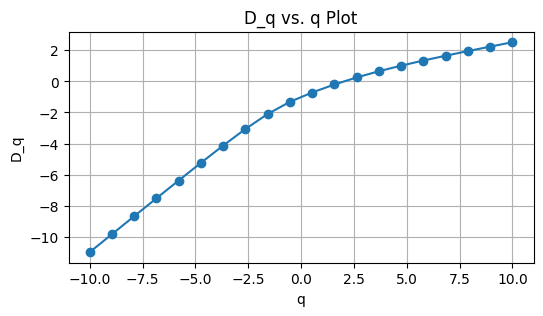

-----subject_1_1.morning_EEG.csv-----


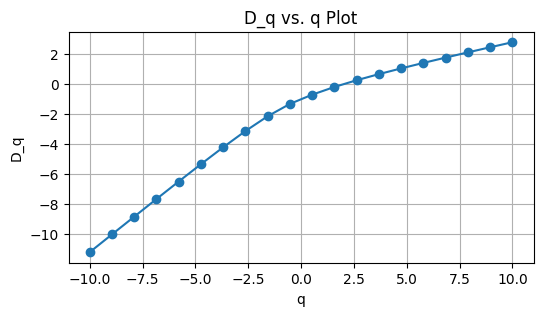

-----subject_7_1.morning_EEG.csv-----


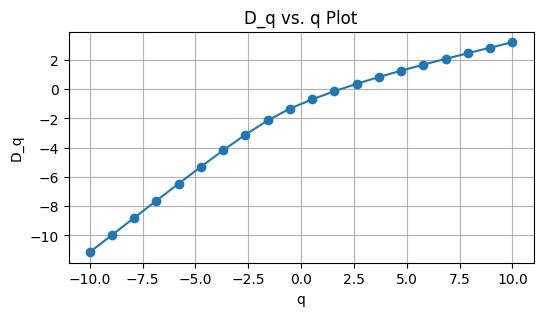

-----subject_2_1.morning_EEG.csv-----


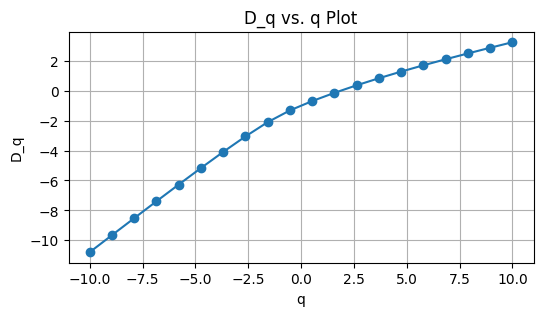

-----subject_6_1.morning_EEG.csv-----


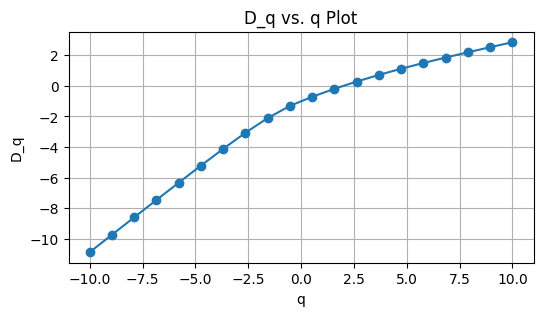

-----subject_3_1.morning_EEG.csv-----


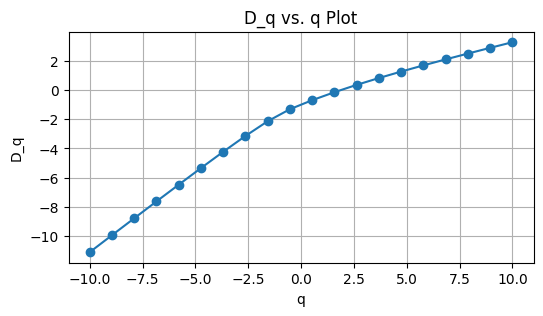

-----subject_17_1.morning_EEG.csv-----


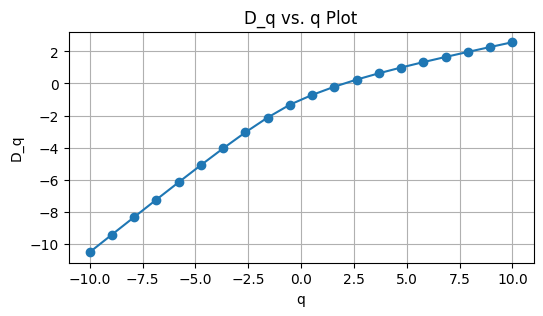

-----subject_23_1.morning_EEG.csv-----


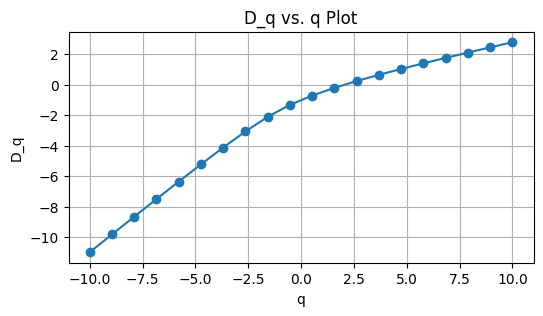

-----subject_12_1.morning_EEG.csv-----


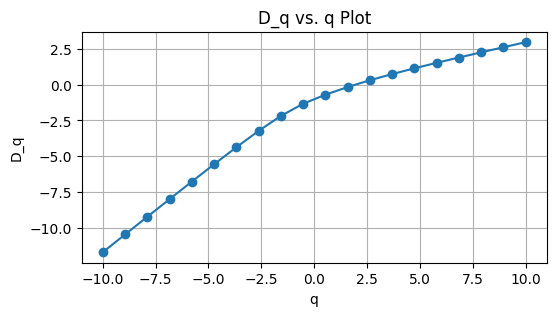

-----subject_16_1.morning_EEG.csv-----


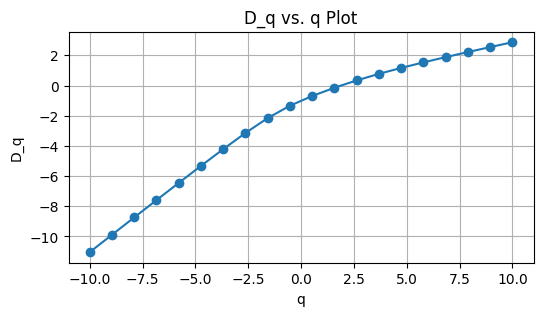

-----subject_22_1.morning_EEG.csv-----


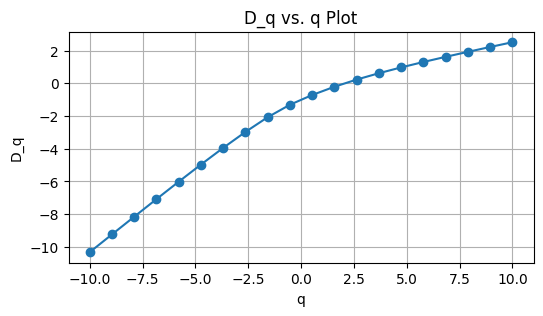

-----subject_13_1.morning_EEG.csv-----


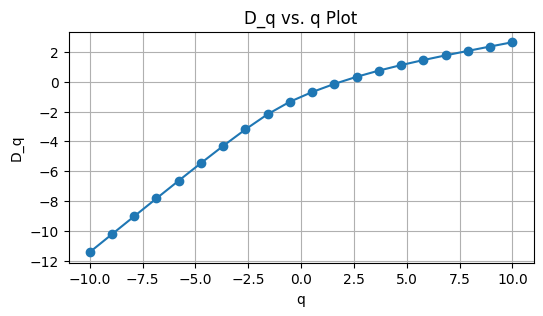

-----subject_15_1.morning_EEG.csv-----


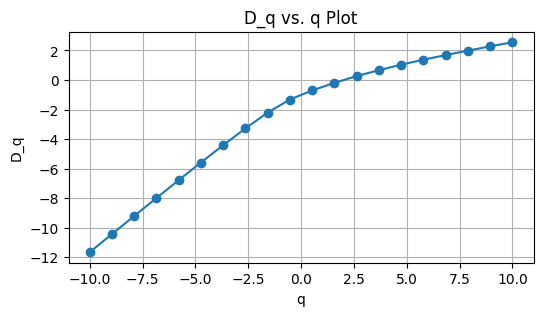

-----subject_8_1.morning_EEG.csv-----


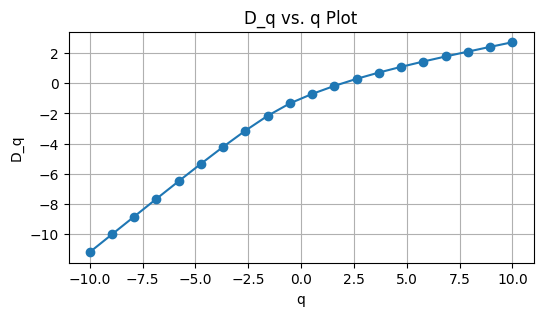

-----subject_21_1.morning_EEG.csv-----


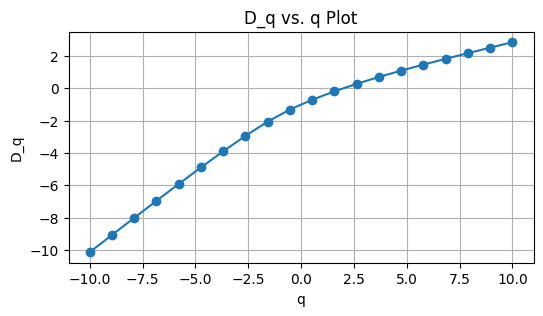

-----subject_10_1.morning_EEG.csv-----


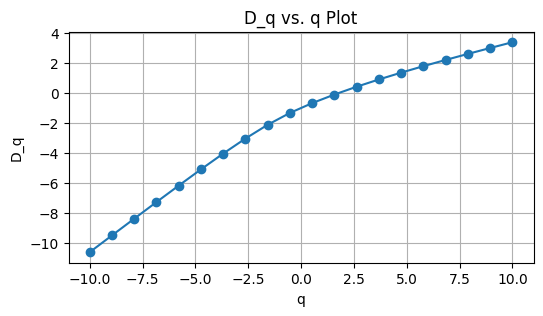

-----subject_14_1.morning_EEG.csv-----


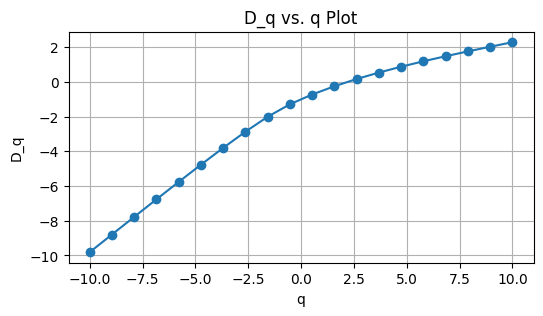

-----subject_20_1.morning_EEG.csv-----


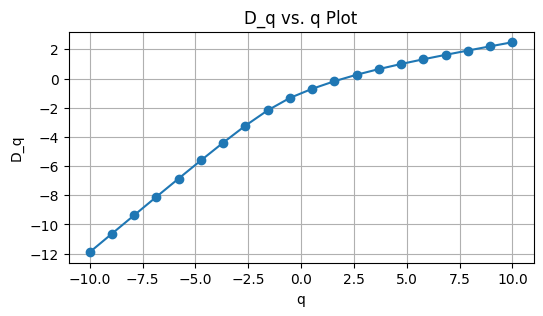

-----subject_9_1.morning_EEG.csv-----


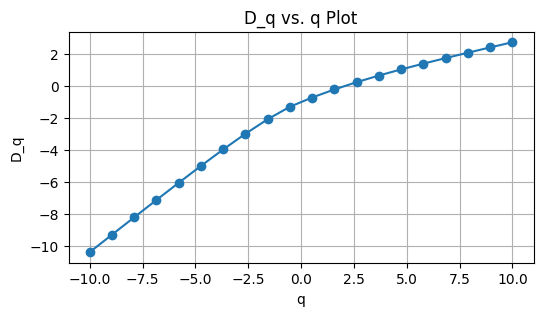

-----subject_11_1.morning_EEG.csv-----


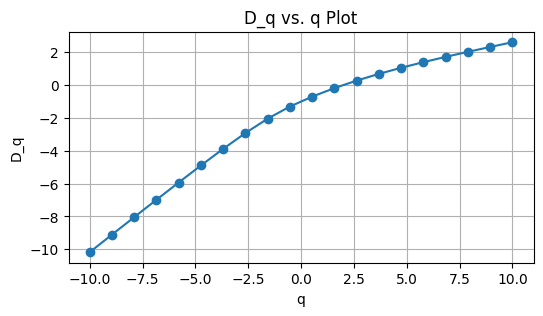

In [20]:
from MFDFA import MFDFA 
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))




for fname in morning_files:
    print('-----{}-----'.format(fname))
    path_to_file= os.path.join(MEFAR_dataset_root,fname)
    df = pd.read_csv(path_to_file)
    df_selected = df[columns_of_interest]
    signal = df_selected.to_numpy()
    signal = signal.T
    lag, dfa = MFDFA(signal[0], lag = lag, q = q, order = 2)
    Dq = []
    for i, qi in enumerate(q):
        Hq = np.polyfit(np.log(lag), np.log(dfa[:, i]), 1)[0]
        Dq.append(Hq * qi - 1)
    
    plt.figure(figsize=(6, 3))
    plt.plot(q, Dq, 'o-')
    plt.title('D_q vs. q Plot')
    plt.xlabel('q')
    plt.ylabel('D_q')
    plt.grid(True)
    plt.show()

